Preliminary explore of the data from https://www.kaggle.com/c/dstl-satellite-imagery-feature-detection/data

Use https://rasterio.readthedocs.io/en/latest/index.html but images are not geotiffs so could use skimage - note also rasterio/gdla is not available on kaggle

In [22]:
import os
import glob

import rasterio
print(rasterio.__version__)
from rasterio.plot import show
from rasterio.plot import show_hist
from matplotlib import pyplot as plt
%matplotlib inline

1.0.13


In [23]:
data_dir = '/Users/robincole/Documents/kaggle/dstl/'

In [24]:
glob.glob(data_dir + '*')

['/Users/robincole/Documents/kaggle/dstl/grid_sizes.csv',
 '/Users/robincole/Documents/kaggle/dstl/train_wkt_v4.csv',
 '/Users/robincole/Documents/kaggle/dstl/sixteen_band',
 '/Users/robincole/Documents/kaggle/dstl/train_geojson_v3',
 '/Users/robincole/Documents/kaggle/dstl/sample_submission.csv',
 '/Users/robincole/Documents/kaggle/dstl/three_band']

In [28]:
three_band = glob.glob(data_dir + 'three_band/*', recursive=True)
print(len(three_band))
three_band[:3]

450


['/Users/robincole/Documents/kaggle/dstl/three_band/6180_4_3.tif',
 '/Users/robincole/Documents/kaggle/dstl/three_band/6130_0_4.tif',
 '/Users/robincole/Documents/kaggle/dstl/three_band/6120_0_4.tif']

There are 450 three band images, lets show one

/Users/robincole/anaconda3/lib/python3.6/site-packages/rasterio/__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


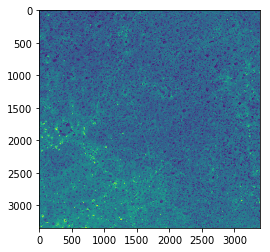

In [27]:
image_file = three_band[0]
with rasterio.open(image_file) as img:
    show(img)

In [30]:
dataset = rasterio.open(image_file)

/Users/robincole/anaconda3/lib/python3.6/site-packages/rasterio/__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


In [31]:
dataset.name

'/Users/robincole/Documents/kaggle/dstl/three_band/6180_4_3.tif'

In [33]:
dataset.count # RGB

3

In [34]:
{i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}

{1: 'uint16', 2: 'uint16', 3: 'uint16'}

In [36]:
dataset.bounds # Just pixel values, not georeferenced

BoundingBox(left=0.0, bottom=3345.0, right=3395.0, top=0.0)

In [38]:
dataset.crs # None returned

In [ ]:
Read the first band

In [39]:
band1 = dataset.read(1)

In [40]:
band1.shape

(3345, 3395)

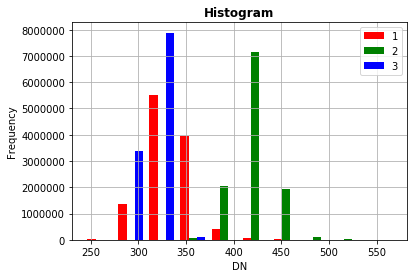

In [41]:
rasterio.plot.show_hist(dataset)

## Skimage

In [42]:
from skimage import io

In [43]:
im = io.imread(image_file)

In [44]:
im.shape

(3345, 3395, 3)

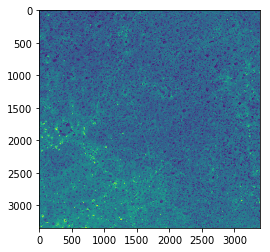

In [45]:
plt.imshow(im[:,:,0])